In [33]:
import matplotlib as mp
import seaborn as sb
import pandas as pd 
import numpy as np
from numpy import math
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [5]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

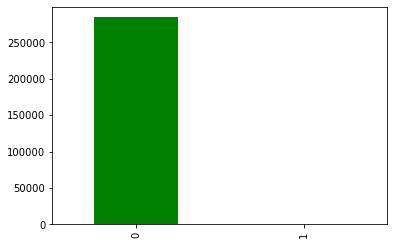

In [10]:
df["Class"].value_counts().plot(kind="bar",color=["green","red"])
plt.show()

In [11]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
legal=df[df.Class==0]
fraud=df[df.Class==1]

In [15]:
print( legal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [16]:
legal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [17]:
legal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
df.groupby("Class").mean()["Amount"]

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

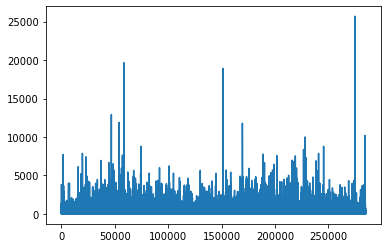

In [25]:
plt.plot(legal["Amount"])

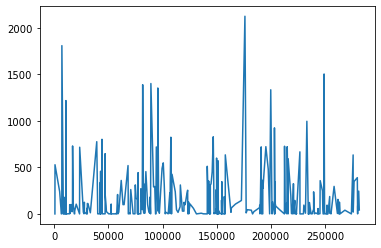

In [26]:
plt.plot(fraud["Amount"])

In [27]:
legal_sample=legal.sample(n=492)

In [28]:
new_df=pd.concat([legal_sample,fraud],axis=0)

In [30]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
126186,77954.0,1.165653,0.484068,0.734358,2.497050,-0.348001,-0.560315,0.041262,-0.022060,-0.524661,...,-0.259760,-0.917875,0.153245,0.295741,0.198039,-0.262252,-0.017802,0.027403,12.92,0
198653,132590.0,2.257143,-0.688547,-2.552356,-1.281558,0.503747,-0.588104,0.028769,-0.253236,-1.004027,...,0.342340,0.842317,-0.134623,-0.084896,0.479669,0.082839,-0.096939,-0.092629,29.00,0
137301,82101.0,1.152732,0.037310,1.302303,1.332648,-0.892978,-0.173755,-0.493829,0.036372,0.745452,...,-0.051263,0.104572,-0.016996,0.416968,0.448159,-0.412228,0.078669,0.040472,9.99,0
147005,88022.0,-0.832220,0.993834,0.449832,-2.687697,0.716731,-1.028568,1.252832,-0.097222,-0.002247,...,-0.278209,-0.693059,-0.160626,-0.326123,-0.018927,0.375633,0.332139,0.211442,5.00,0
274199,165898.0,-0.559516,0.812801,0.661112,-0.419728,0.659502,-0.991985,1.014473,-0.283861,-0.273850,...,0.331280,0.996496,-0.470981,-0.039600,0.324548,-0.013446,-0.004354,0.116952,19.95,0


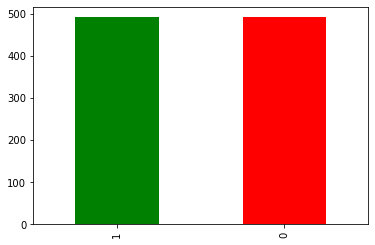

In [31]:
new_df["Class"].value_counts().plot(kind="bar",color=["green","red"])
plt.show()

In [32]:
new_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94433.928862,0.003441,0.023426,0.041086,-0.005245,-0.034593,0.010518,0.024616,0.054749,-0.096295,...,0.008006,-0.000958,-0.021455,0.007168,0.006537,0.015405,0.033671,-0.013173,-0.012269,89.544329
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [34]:
X=new_df.drop("Class",axis=1)
y=new_df["Class"]

In [36]:
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
126186,77954.0,1.165653,0.484068,0.734358,2.497050,-0.348001,-0.560315,0.041262,-0.022060,-0.524661,...,-0.222032,-0.25976,-0.917875,0.153245,0.295741,0.198039,-0.262252,-0.017802,0.027403,12.92
198653,132590.0,2.257143,-0.688547,-2.552356,-1.281558,0.503747,-0.588104,0.028769,-0.253236,-1.004027,...,-0.044654,0.34234,0.842317,-0.134623,-0.084896,0.479669,0.082839,-0.096939,-0.092629,29.00


In [39]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
le=LogisticRegression()

In [40]:
y_test

42756     1
281594    0
111690    1
236286    0
75937     0
         ..
272572    0
152206    0
6641      1
162996    0
102441    1
Name: Class, Length: 197, dtype: int64

In [41]:
le.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred=le.predict(X_test)

In [43]:
confusion_matrix=confusion_matrix(y_test,y_pred)

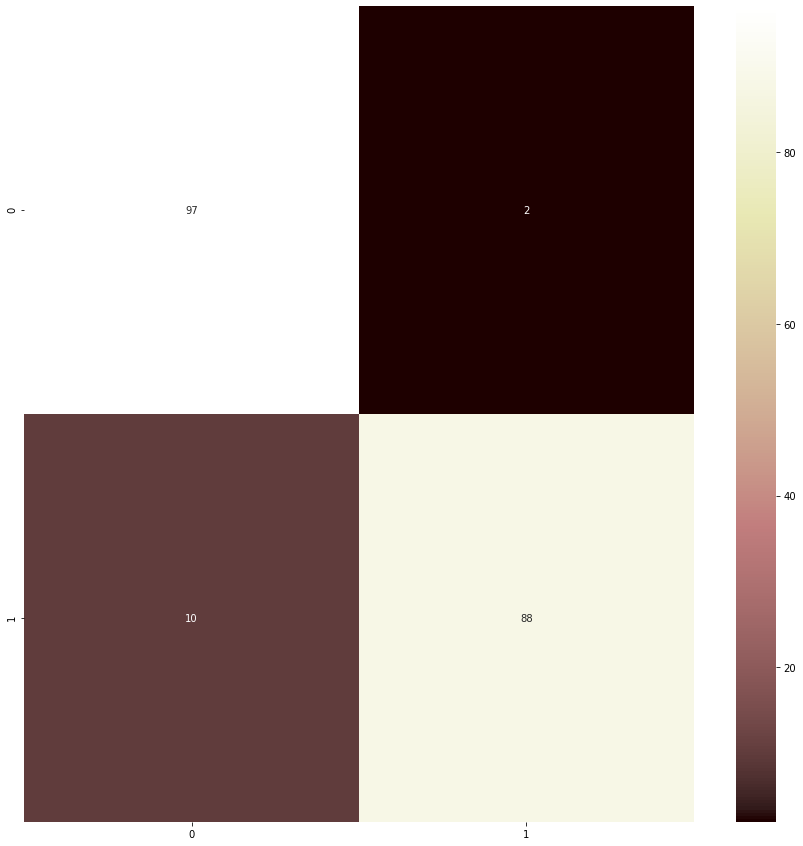

In [44]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sb.heatmap(confusion_matrix,annot=True,cmap="pink")

In [45]:
accuracy_score(y_test,y_pred)

0.9390862944162437